

# Surface Comparison

## Background

## Our data

We want to:
- Compare to the Benomar+15 work by:
    - Plotting seismic vsini against spectroscopic vsini

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
sns.set_palette('colorblind')

/Users/Oliver/Library/Python/3.7/lib/python/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def mnras_size(fig_width_pt, square=False):
    inches_per_pt = 1.0/72.00              # Convert pt to inches
    golden_mean = (np.sqrt(5)-1.0)/2.0     # Most aesthetic ratio
    fig_width = fig_width_pt*inches_per_pt # Figure width in inches
    if square:
        fig_height = fig_width
    else:
        fig_height = fig_width*golden_mean
    return [fig_width,fig_height]

In [3]:
f_ati = pd.read_csv('../data/atium.csv', index_col=0)
ati = f_ati.loc[f_ati.eye_flag != 3]

In [4]:
len(ati)

94

## Compare $v\sin i$

The LEGACY and Kages data report $v\sin i$ for most stars in the sample, which we can use for our comparison. We also have additional data from Campante+15.

In [5]:
# read in legacy
f_lit = pd.read_csv('../data/malatium.csv',usecols=['KIC','vsini','evsini']).rename(
                                columns={'vsini':'L_vsini','evsini':'e_L_vsini'})
lit = f_lit.loc[f_ati.eye_flag != 3]

In [6]:
lit

,KIC,e_L_vsini,L_vsini
0,1435467,0.5,11.9
1,2837475,0.5,23.3
2,3427720,0.5,2.9
3,3456181,0.5,8.5
4,3632418,0.5,8.5
...,...,...,...
90,11295426,0.5,0.5
91,11401755,1.0,4.9
92,11807274,0.5,10.3
93,11853905,0.5,2.3


In [7]:
# read in benomar
B15 = pd.read_csv('../data/benomar_15.csv',sep='\s+')
lit = pd.merge(lit, B15, on='KIC', how='left')
lit.index = ati.index

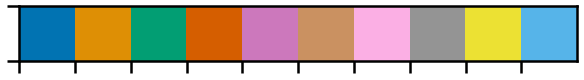

In [8]:
cmap = sns.color_palette('colorblind')
sns.palplot(cmap)

Drop KICs 6603624, 8760414 \& 8938364

In [9]:
ati.drop(ati[ati.KIC == 6603624].index, inplace=True)
ati.drop(ati[ati.KIC == 8760414].index, inplace=True)
ati.drop(ati[ati.KIC == 8938364].index, inplace=True)
lit.drop(lit[lit.KIC == 6603624].index, inplace=True)
lit.drop(lit[lit.KIC == 8760414].index, inplace=True)
lit.drop(lit[lit.KIC == 8938364].index, inplace=True)

/Users/Oliver/Library/Python/3.7/lib/python/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
sel = (lit.L_vsini > 0).values

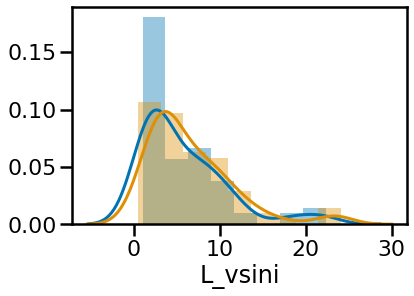

In [11]:
sns.distplot(ati.vsini[sel])
sns.distplot(lit.L_vsini[sel])

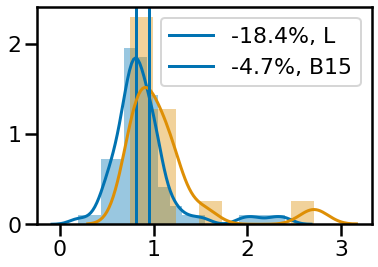

In [12]:
diff = ati.vsini[sel]/lit.L_vsini[sel]
sns.distplot(diff)
m = np.median(diff)
plt.axvline(m, label=f'{100*(m-1):.1f}%, L')

diff = ati.vsini/lit.B_vsini
diff = diff.dropna()
sns.distplot(diff)
m = np.median(diff)
plt.axvline(m, label=f'{100*(m-1):.1f}%, B15')

plt.legend()

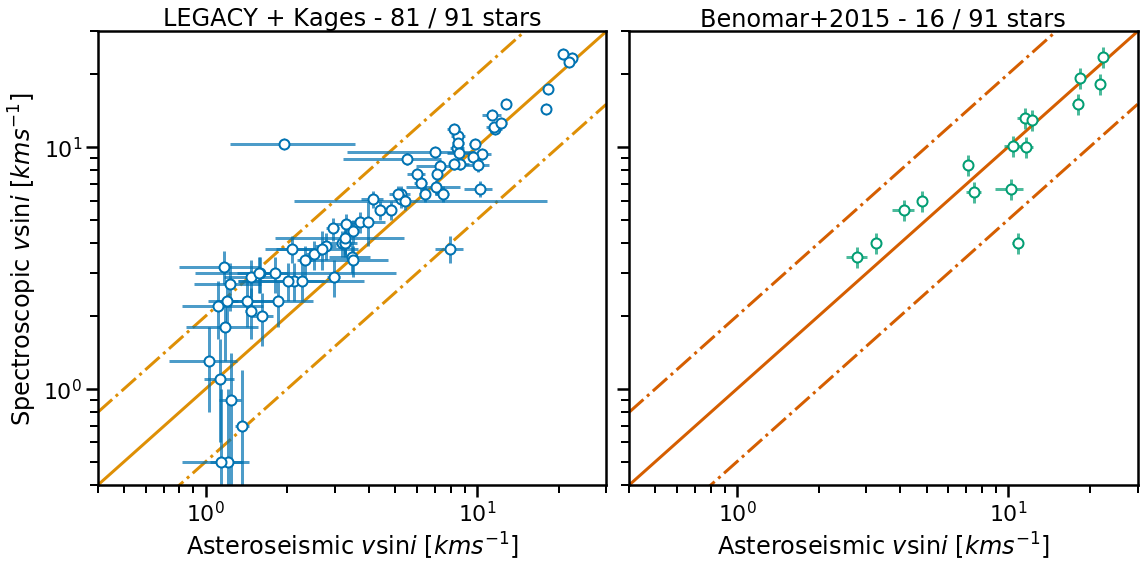

In [13]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True, sharex=True)
ax.scatter(ati.vsini[sel], lit.L_vsini[sel], s=100, fc='w', ec=cmap[0], zorder=3, lw=2)

ax.errorbar(ati.vsini[sel], lit.L_vsini[sel], 
            xerr = [ati.l_vsini[sel], ati.u_vsini[sel]], yerr = lit.e_L_vsini[sel], fmt='|', c=cmap[0], alpha=.7)

ax.set_xlabel(r'Asteroseismic $v\sin i$ $[kms^{-1}]$')
ax2.set_xlabel(r'Asteroseismic $v\sin i$ $[kms^{-1}]$')
ax.set_ylabel(r'Spectroscopic $v\sin i$ $[kms^{-1}]$')

lower=0.4
upper = 30
bs = np.linspace(lower, upper, 100)
ax.plot(bs, bs, ls='-', c=cmap[1], zorder=0)
ax.plot(bs, 2*bs, ls='-.', c=cmap[1], zorder=0)
ax.plot(bs, 0.5*bs, ls='-.', c=cmap[1], zorder=0)

ax.set_xscale('log')
ax.set_yscale('log')

#####
ax2.scatter(ati.vsini, lit.B_vsini, s=100, fc='w', ec=cmap[2], zorder=3, lw=2)

ax2.errorbar(ati.vsini, lit.B_vsini, 
            xerr = [ati.l_vsini, ati.u_vsini], yerr = lit.e_B_vsini, fmt='|', c=cmap[2], alpha=.7)

bs = np.linspace(lower, upper, 100)
ax2.plot(bs, bs, c=cmap[3], zorder=0)
ax2.plot(bs, 2*bs, ls='-.', c=cmap[3], zorder=0)
ax2.plot(bs, 0.5*bs, ls='-.', c=cmap[3], zorder=0)

ax.set_xlim(lower, upper)
ax.set_ylim(lower, upper)

ax.set_title(f'LEGACY + Kages - {len(lit[np.isfinite(lit.L_vsini)])} / {len(lit)} stars')
ax2.set_title(f'Benomar+2015 - {len(lit[np.isfinite(lit.B_vsini)])} / {len(lit)} stars')

fig.tight_layout()
# plt.savefig('/home/oliver/Dropbox/Apps/Overleaf/Malatium/Images/vsini-comparison.pdf', bbox_inches='tight', rasterized=True)
plt.savefig('/Users/Oliver/Dropbox/Apps/Overleaf/Malatium/Images/vsini-comparison.pdf', bbox_inches='tight', rasterized=True)
plt.show()